In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HealthApp_2k.log_structured.csv',encoding='ascii')

In [3]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [5]:
df.describe()

,LineId,Pid
count,2000.000000,2000.0
mean,1000.500000,30002312.0
std,577.494589,0.0
min,1.000000,30002312.0
25%,500.750000,30002312.0
50%,1000.500000,30002312.0
75%,1500.250000,30002312.0
max,2000.000000,30002312.0


In [6]:
df.shape

(2000, 7)

In [7]:
# Converting time to date and time
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f', errors='coerce')

In [8]:
# Extract features from time
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.day
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year

In [9]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Hour,Day,Month,Year
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22,23,12,2017
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,22,23,12,2017
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,22,23,12,2017
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,22,23,12,2017
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,22,23,12,2017


In [10]:
# Steps taken event
steps_df = df[df['EventTemplate'] == 'onStandStepChanged <*>'].copy()

In [12]:
# Extracting steps from Content
steps_df['Steps'] = steps_df['Content'].str.extract('(\d+)').astype(int)

In [13]:
steps_df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Hour,Day,Month,Year,Steps
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22,23,12,2017,3579
7,8,2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22,23,12,2017,3579
12,13,2017-12-23 22:15:29.738,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22,23,12,2017,3579
13,14,2017-12-23 22:15:29.792,Step_LSC,30002312,onStandStepChanged 3580,E42,onStandStepChanged <*>,22,23,12,2017,3580
20,21,2017-12-23 22:15:30.331,Step_LSC,30002312,onStandStepChanged 3581,E42,onStandStepChanged <*>,22,23,12,2017,3581


In [14]:
steps_df.shape

(260, 12)

In [15]:
# Creating a 'Date' column from 'Year', 'Month', and 'Day'
steps_df['Date'] = pd.to_datetime(steps_df[['Year', 'Month', 'Day']])

In [16]:
# Aggregating steps by day
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

<Figure size 1400x700 with 0 Axes>

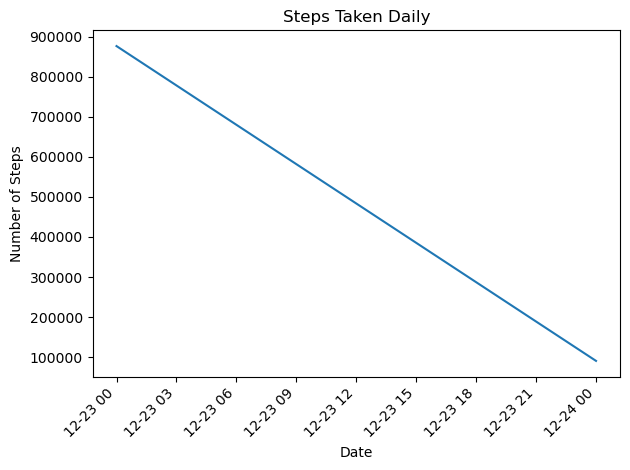

In [23]:
# Plotting daily steps
plt.figure(figsize=(14, 7))
daily_steps.plot(kind='line', x='Date', y='Steps', legend=None)
plt.title('Steps Taken Daily')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Aggregating events by hour to find active times
active_hours = df.groupby('Hour')['EventId'].count().reset_index()

<Figure size 1400x700 with 0 Axes>

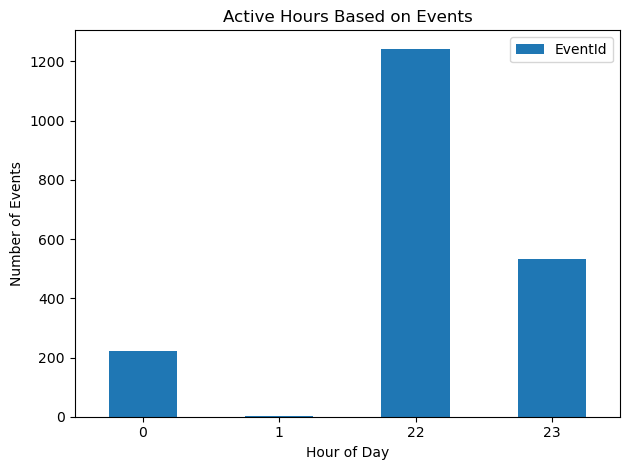

In [19]:
# Plotting active hours
plt.figure(figsize=(14, 7))
active_hours.plot(kind='bar', x='Hour', y='EventId')
plt.title('Active Hours Based on Events')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Output the head of daily steps for preview
print(daily_steps.head())

        Date   Steps
0 2017-12-23  876320
1 2017-12-24   90864


In [21]:
# Output the head of active hours for preview
print(active_hours.head())

   Hour  EventId
0     0      221
1     1        3
2    22     1243
3    23      533
